# AI Assignment 3 by Yuva Sai Varma

### Build a CNN model for Bird species
Bird species classification is the process of using machine learning and computer vision techniques to identify and categorize different species of birds based
on their visual characteristics. By analyzing images of birds, models can extract features and patterns to accurately classify bird species. This classification is
vital for ecological research, wildlife monitoring, and conservation efforts. Advancements in deep learning and the availability of large annotated datasets have
improved the accuracy of bird species classification models. Challenges include variations in lighting, pose, and background clutter. Ongoing research
focuses on methods like transfer learning and data augmentation to enhance classification performance and contribute to avian biodiversity understanding
and conservation.

Dataset Link: https://www.kaggle.com/datasets/akash2907/bird-species-classification

In [ ]:
#mounting google deive

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#unzip files

!unzip '/content/drive/MyDrive/test_data (1).zip'

Archive:  /content/drive/MyDrive/test_data (1).zip
   creating: test_data/
   creating: test_data/blasti/
  inflating: test_data/blasti/DSC_6396.jpg  
  inflating: test_data/blasti/DSC_6397.jpg  
  inflating: test_data/blasti/DSC_6398.jpg  
  inflating: test_data/blasti/DSC_6399.jpg  
  inflating: test_data/blasti/DSC_6400.jpg  
  inflating: test_data/blasti/DSC_6401.jpg  
  inflating: test_data/blasti/DSC_6402.jpg  
  inflating: test_data/blasti/DSC_6403.jpg  
  inflating: test_data/blasti/DSC_6405.jpg  
  inflating: test_data/blasti/DSC_6406.jpg  
  inflating: test_data/blasti/DSC_6407.jpg  
  inflating: test_data/blasti/DSC_6408.jpg  
  inflating: test_data/blasti/DSC_6409.jpg  
  inflating: test_data/blasti/DSC_6410.jpg  
  inflating: test_data/blasti/DSC_6411.jpg  
   creating: test_data/bonegl/
  inflating: test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/bonegl/DSC_4588.jpg  
  inflating: test_data/bonegl/DSC_4589.jpg  
  inflating: test_data/bonegl/DSC_4590.jpg  
  inflat

### Data Agumentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/test_data',
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)

test = test_gen.flow_from_directory('/content/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)

Found 157 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

### CNN model

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
# Sequential model
model = Sequential()

#Convolutional layer
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))

#Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Layer
model.add(Flatten())

#Fully Connected Layer
model.add(Dense(54,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 20)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 69620)             0         
                                                                 
 dense (Dense)               (None, 54)                3759534   
                                                                 
 dense_1 (Dense)             (None, 16)                880       
                                                                 
Total params: 3,760,974
Trainable params: 3,760,974
Non-trainable params: 0
______________________________________________

In [ ]:
# Model compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#fit the model
model.fit(train,batch_size=8,validation_data=test,epochs=30)

Epoch 1/20
20/20 [==============================] - 96s 5s/step - loss: 2.7830 - accuracy: 0.1083 - val_loss: 2.6206 - val_accuracy: 0.2166
Epoch 2/20
20/20 [==============================] - 95s 5s/step - loss: 2.6078 - accuracy: 0.1146 - val_loss: 2.4967 - val_accuracy: 0.2038
Epoch 3/20
20/20 [==============================] - 96s 5s/step - loss: 2.4679 - accuracy: 0.2038 - val_loss: 2.3234 - val_accuracy: 0.1529
Epoch 4/20
20/20 [==============================] - 96s 5s/step - loss: 2.3481 - accuracy: 0.1592 - val_loss: 2.2848 - val_accuracy: 0.2739
Epoch 5/20
20/20 [==============================] - 132s 7s/step - loss: 2.1736 - accuracy: 0.2930 - val_loss: 1.9616 - val_accuracy: 0.3567
Epoch 6/20
20/20 [==============================] - 95s 5s/step - loss: 1.9745 - accuracy: 0.3503 - val_loss: 1.8049 - val_accuracy: 0.3694
Epoch 7/20
20/20 [==============================] - 95s 5s/step - loss: 1.8237 - accuracy: 0.3567 - val_loss: 1.5928 - val_accuracy: 0.4331
Epoch 8/20
20/20 [=

#### Test 1

Let's test with image from 'bonegl'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

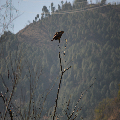

In [ ]:
img = image.load_img('/content/test_data/bonegl/DSC_4587.jpg',target_size=(120,120))
img

In [ ]:
img = image.img_to_array(img)
img

array([[[153., 168., 187.],
        [154., 173., 190.],
        [157., 174., 192.],
        ...,
        [151., 166., 185.],
        [150., 167., 185.],
        [156., 167., 185.]],

       [[155., 168., 187.],
        [157., 175., 195.],
        [157., 175., 195.],
        ...,
        [148., 154., 166.],
        [150., 159., 176.],
        [151., 162., 180.]],

       [[155., 172., 190.],
        [158., 175., 195.],
        [157., 175., 195.],
        ...,
        [123., 135., 149.],
        [136., 144., 165.],
        [124., 136., 152.]],

       ...,

       [[ 65.,  69.,  68.],
        [ 44.,  26.,  26.],
        [ 70.,  69.,  65.],
        ...,
        [ 61.,  53.,  50.],
        [ 68.,  61.,  55.],
        [ 57.,  53.,  50.]],

       [[ 74.,  73.,  71.],
        [ 84.,  85.,  80.],
        [ 65.,  61.,  60.],
        ...,
        [ 68.,  60.,  57.],
        [ 66.,  57.,  50.],
        [ 67.,  59.,  57.]],

       [[ 65.,  65.,  65.],
        [ 92.,  83.,  78.],
        [ 66.,  

In [ ]:
img = np.expand_dims(img,axis=0)
img

array([[[[153., 168., 187.],
         [154., 173., 190.],
         [157., 174., 192.],
         ...,
         [151., 166., 185.],
         [150., 167., 185.],
         [156., 167., 185.]],

        [[155., 168., 187.],
         [157., 175., 195.],
         [157., 175., 195.],
         ...,
         [148., 154., 166.],
         [150., 159., 176.],
         [151., 162., 180.]],

        [[155., 172., 190.],
         [158., 175., 195.],
         [157., 175., 195.],
         ...,
         [123., 135., 149.],
         [136., 144., 165.],
         [124., 136., 152.]],

        ...,

        [[ 65.,  69.,  68.],
         [ 44.,  26.,  26.],
         [ 70.,  69.,  65.],
         ...,
         [ 61.,  53.,  50.],
         [ 68.,  61.,  55.],
         [ 57.,  53.,  50.]],

        [[ 74.,  73.,  71.],
         [ 84.,  85.,  80.],
         [ 65.,  61.,  60.],
         ...,
         [ 68.,  60.,  57.],
         [ 66.,  57.,  50.],
         [ 67.,  59.,  57.]],

        [[ 65.,  65.,  65.],
       

In [ ]:
pred = np.argmax(model.predict(img))
print(pred)

1/1 [==============================] - 0s 129ms/step
1


In [ ]:
train.class_indices.keys()

dict_keys(['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt'])

In [ ]:
output=['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

bonegl


#### Test 2

Let's take image from himbul

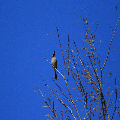

In [ ]:
img1 = image.load_img('/content/test_data/himbul/11602064885_3826df4500_o.jpg',target_size=(120,120))
img1

In [ ]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred1 = np.argmax(model.predict(img1))
print(pred1)
print(output[pred1])

1/1 [==============================] - 0s 17ms/step
7
himbul


# VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [ ]:
train = train_gen.flow_from_directory('/content/test_data',
                                      target_size=(224, 224),
                                      class_mode='categorical', 
                                      batch_size=8)

test = test_gen.flow_from_directory('/content/test_data',
                                    target_size=(224, 224),
                                      class_mode='categorical', 
                                      batch_size=8)

In [ ]:
# Now let us add preprocess layer infront of vgg16

vgg = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [ ]:
# Now let us see the layers in the vgg16

for layer in vgg.layers:
  print(layer)

In [ ]:
# Now let us train model with existing weights

for layer in vgg.layers:
  layer.trainable=False

In [ ]:
# Now let us flatten the feature map

x = Flatten()(vgg.output)

In [ ]:
# output layer

prediction = Dense(16,activation='softmax')(x)

In [ ]:
# Create Vgg16 model

from tensorflow.keras.models import Model
vgg_model = Model(inputs=vgg.input,outputs=prediction)

In [ ]:
vgg_model.summary()

In [ ]:
# let us compile the model

vgg_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
vgg_model.fit(train,epochs=5,validation_data=test,steps_per_epoch=len(train),
              validation_steps=len(test))